In [9]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
from settings import SONGS_PATH
import glob
import os

dfs = []

for file in glob.glob(os.path.join(SONGS_PATH, "*.csv")):
    df = pd.read_csv(file)

    filename = os.path.basename(file)
    date = os.path.splitext(filename)[0]
    
    # Agregar columna con el nombre del archivo
    df['fecha'] = date
    
    dfs.append(df)

# Concatenar todos los DataFrames
df = pd.concat(dfs, ignore_index=True)

# Parsear día y hora
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%m-%Y')
df['hora'] = pd.to_timedelta(df['hora'])
df['fecha'] = df['fecha'] + df['hora']
df.drop(columns='hora', inplace=True)

df.head()

,artista,cancion,fecha
0,DONNA LEWIS,I COULD BE THE ONE,2026-01-01 00:00:00
1,FOREIGNER,URGENT,2026-01-01 00:03:16
2,TAYLOR SWIFT,BLANK SPACE (TAYLOR'S VERSION),2026-01-01 00:07:37
3,DAVID BOWIE,LET'S DANCE,2026-01-01 00:11:57
4,KOLUMBIA,GENIO,2026-01-01 00:16:18


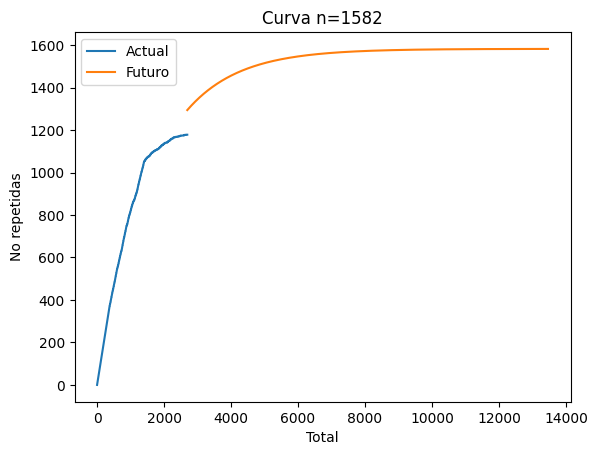

In [2]:
from analysis import plot_curve

plot_curve(df)

In [3]:
df_counts = df.groupby(['artista', 'cancion']).size().reset_index(name='counts')
df_counts.head()

'''
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_counts.sort_values('artista'))
'''

print(len(df_counts))
print(len(df))

1178
2694


In [4]:
df_counts.sort_values('counts', ascending=False).head()

,artista,cancion,counts
298,EUROPE,CARRIE,7
398,GUNS N' ROSES,PATIENCE,6
92,BILLY IDOL,EYES WITHOUT A FACE,6
525,KOKO STAMBUK,VALIENTE,5
357,"GABIGAR, DULCE Y AGRAZ",PEQUEÑO BAILE,5


In [5]:
# CON REPETICIONES
df_art = df_counts[['artista', 'counts']].groupby('artista').sum().reset_index()
df_art = df_art.sort_values('counts', ascending=False)
df_art.head(10)

,artista,counts
250,NICOLE,35
231,MICHAEL JACKSON,34
191,LA LEY,33
217,MADONNA,33
134,GEPE,32
162,JAVIERA MENA,31
371,THE ROLLING STONES,28
163,JAVIERA PARRA,26
93,DURAN DURAN,26
209,LOS TRES,25


In [6]:
# SIN REPETICIONES
df_art = df_counts[['artista']].groupby('artista').size().reset_index(name='counts')
df_art = df_art.sort_values('counts', ascending=False)
df_art.head(10)

,artista,counts
217,MADONNA,20
231,MICHAEL JACKSON,17
206,LOS PRISIONEROS,15
209,LOS TRES,15
351,THE BEATLES,14
321,SODA STEREO,13
191,LA LEY,13
93,DURAN DURAN,12
119,FITO PAEZ,12
134,GEPE,12


In [16]:
df_counts[df_counts['artista'] == 'MADONNA']

,artista,cancion,counts
625,MADONNA,BORDERLINE,2
626,MADONNA,CHERISH,2
627,MADONNA,CRAZY FOR YOU,1
628,MADONNA,EXPRESS YOURSELF,2
629,MADONNA,HOLIDAY,1
630,MADONNA,I'LL REMEMBER,1
631,MADONNA,INTO THE GROOVE,1
632,MADONNA,JUMP,2
633,MADONNA,LA ISLA BONITA,2
634,MADONNA,LIKE A PRAYER,1


In [7]:
df_app = df.sort_values('fecha').drop_duplicates(subset=['artista'])
df_app.tail(10)


,artista,cancion,fecha
1241,SKID ROW,I REMEMBER YOU,2026-01-04 22:56:07
1251,LOS ABUELOS DE LA NADA,MIL HORAS,2026-01-04 23:45:09
1259,EAGLES,HOTEL CALIFORNIA (UNPLUGGED),2026-01-05 00:14:35
1417,MIGUEL BOSE,MORENA MIA,2026-01-05 10:39:58
1553,SPIN DOCTORS,TWO PRINCES,2026-01-05 20:04:09
1591,TAM TAM GO,ESPALDAS MOJADAS,2026-01-05 22:42:56
1636,PEDRO SUAREZ VERTIZ,ME ESTOY ENAMORANDO,2026-01-06 01:41:26
1823,FUGEES,KILLING ME SOFTLY,2026-01-06 14:31:38
1840,ATERCIOPELADOS,BOLERO FALAZ,2026-01-06 15:42:43
2253,MATCHBOX TWENTY,IF YOU'RE GONE,2026-01-08 18:59:45
